In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mandelbrot.mandelbrot import enumerate_mandelbrot_set, calculate_mandelbrot_naive, calculate_mandelbrot_vectorized, calculate_mandelbrot_naive_with_numba
from mandelbrot.plot_mandelbrot import plot_mandelbrot
from mandelbrot.multiprocessing_mandelbrot import calculate_mandelbrot_multithreaded
import timeit

In [3]:
# Create an array of complex numbers
pre = 5000
pim = 5000

pre_from = -2
pre_to = 1
pim_from = -1.5
pim_to = 1.5

R = np.linspace(pre_from, pre_to, pre)
I = 1j * np.linspace(pim_from, pim_to, pim)

R, I = np.meshgrid(R, I)

C = R + I

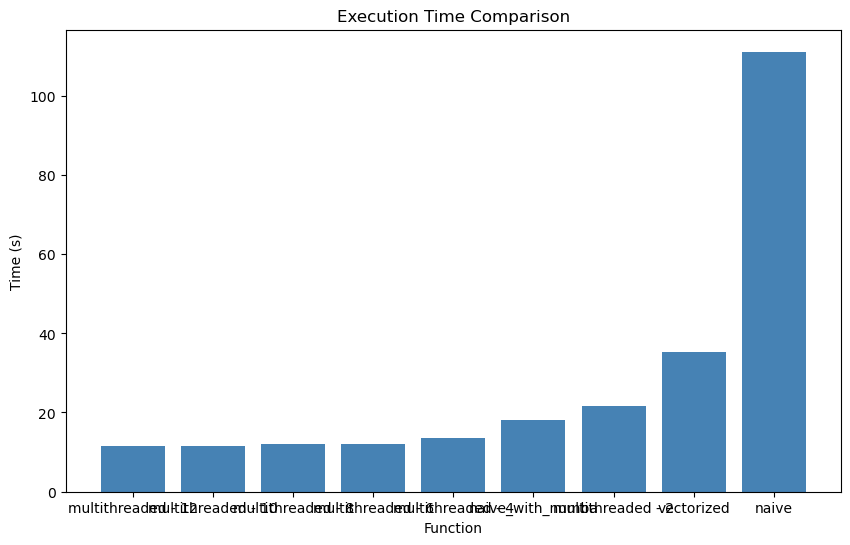

In [13]:
# Define your functions and arguments
functions = [
    ('naive', lambda: enumerate_mandelbrot_set(C, 100, calculate_mandelbrot_naive)),
    ('vectorized', lambda: calculate_mandelbrot_vectorized(C, 100)),
    ('naive_with_numba', lambda: enumerate_mandelbrot_set(C, 100, calculate_mandelbrot_naive_with_numba)),
    ('multithreaded - 12', lambda: calculate_mandelbrot_multithreaded(C, 100, 12)),
    ('multithreaded - 10', lambda: calculate_mandelbrot_multithreaded(C, 100, 10)),
    ('multithreaded - 8', lambda: calculate_mandelbrot_multithreaded(C, 100, 8)),
    ('multithreaded - 6', lambda: calculate_mandelbrot_multithreaded(C, 100, 6)),
    ('multithreaded - 4', lambda: calculate_mandelbrot_multithreaded(C, 100, 4)),
    ('multithreaded - 2', lambda: calculate_mandelbrot_multithreaded(C, 100, 2))
]

# Measure execution time for each function
times = []
for name, func in functions:
    start_time = timeit.default_timer()
    func()
    elapsed = timeit.default_timer() - start_time
    times.append((name, elapsed))




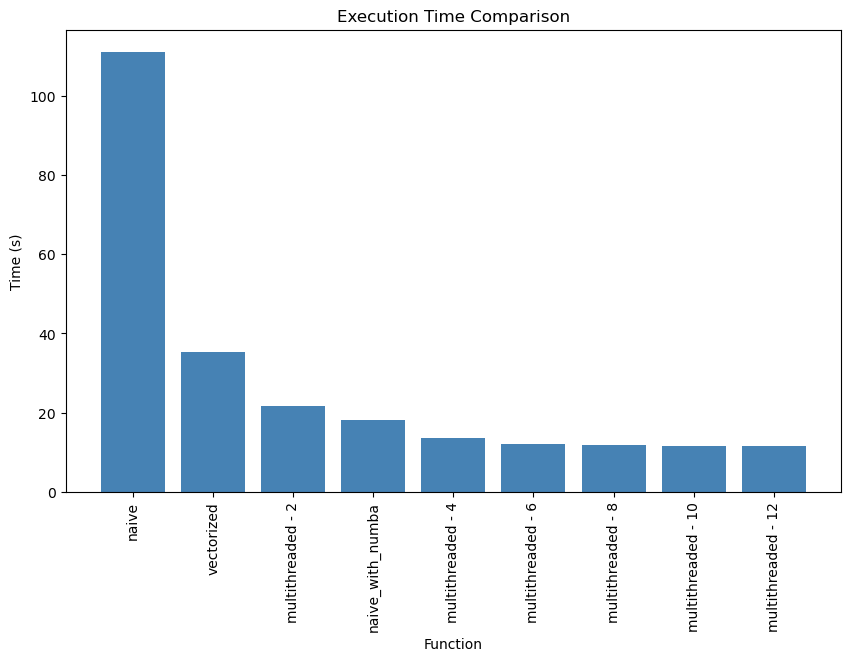

In [15]:
# Sort results by time
times.sort(key=lambda x: x[1], reverse=True)

# Split the tuples into two lists for easy plotting
names, elapsed_times = zip(*times)


# Plot the results
plt.figure(figsize=(10,6))
plt.bar(names, elapsed_times, color='steelblue')
plt.xlabel('Function')
plt.xticks(rotation=90)
plt.ylabel('Time (s)')
plt.title('Execution Time Comparison')
plt.show()

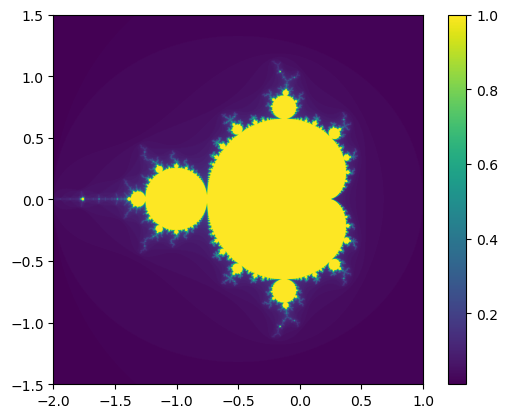

In [16]:
extent = [pre_from, pre_to, pim_from, pim_to]

MandelbrotSet = calculate_mandelbrot_multithreaded(C, 100, 6)
plot_mandelbrot(MandelbrotSet, extent=extent)